In [1]:
# import the libraries as shown below
from keras.models import Sequential,load_model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image
import pandas as pd
import numpy as np

In [2]:
img_size = [64,64,3]

In [3]:
test = 'test'                         
train = 'train'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18743 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 6251 images belonging to 2 classes.


In [7]:
training_set.class_indices

{'CAT': 0, 'DOG': 1}

In [8]:
test_set.class_indices

{'CAT': 0, 'DOG': 1}

In [9]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, input_shape=[64, 64, 3]))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=128, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))     

model1.add(Conv2D(filters=256, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.5))                                                                        
model1.add(Flatten()) # neural network beulding
model1.add(Dense(units=128, activation='relu')) # input layers
model1.add(Dropout(0.1))                                    
model1.add(Dense(units=256, activation='relu'))                                    
model1.add(Dropout(0.25))             
model1.add(Dense(units=2, activation='softmax')) # output layer

In [10]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history1 = model1.fit(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/7
 627/1172 [===============>..............] - ETA: 1:11 - loss: 0.6758 - accuracy: 0.5804

c:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1172/1172 [==============================] - 185s 158ms/step - loss: 0.6541 - accuracy: 0.6108 - val_loss: 0.5864 - val_accuracy: 0.6956
Epoch 2/7
1172/1172 [==============================] - 175s 149ms/step - loss: 0.5717 - accuracy: 0.7098 - val_loss: 0.5300 - val_accuracy: 0.7445
Epoch 3/7
1172/1172 [==============================] - 179s 153ms/step - loss: 0.5119 - accuracy: 0.7544 - val_loss: 0.4568 - val_accuracy: 0.7848
Epoch 4/7
1172/1172 [==============================] - 181s 155ms/step - loss: 0.4768 - accuracy: 0.7781 - val_loss: 0.4483 - val_accuracy: 0.7912
Epoch 5/7
1172/1172 [==============================] - 196s 167ms/step - loss: 0.4449 - accuracy: 0.7954 - val_loss: 0.4791 - val_accuracy: 0.7621
Epoch 6/7
1172/1172 [==============================] - 193s 165ms/step - loss: 0.4343 - accuracy: 0.8030 - val_loss: 0.3795 - val_accuracy: 0.8335
Epoch 7/7
1172/1172 [==============================] - 198s 169ms/step - loss: 0.4171 - accuracy: 0.8112 - val_loss: 0.4195 - va

In [14]:
model =load_model("Cat_Dog_classifier.h5")

In [23]:
img_path = "test/DOG/9381.jpg"

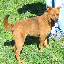

In [24]:
img=image.load_img(img_path,target_size=(64,64))
img

In [25]:
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x)[0], axis=-1)

if pred==1:
  print('DOG')
else:
  print("CAT")

DOG


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0